In [131]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [278]:
df = pd.read_csv("../assets/data/data.csv")

/tmp/ipykernel_965/1842810860.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [279]:
df.columns

Index(['Date_Time', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'Year', 'z_LATITUDE', 'z_LONGITUDE'],
      dtype='object')

In [280]:
data = df[['Date_Time', 'BOROUGH', 'Year', 'COLLISION_ID']]
data_Brok = data.loc[data.BOROUGH == "BROOKLYN"]
data_Brok['Date_Time'] = pd.to_datetime(data_Brok['Date_Time'])
data_Brok["Weekday"] = data_Brok.Date_Time.dt.dayofweek < 5
data_Brok["hour"] = data_Brok.Date_Time.dt.hour
data_Brok['Weekday'] = data_Brok['Weekday'].replace({True: 'Business Days', False: 'Weekends'})
grouped_count = data_Brok.groupby(["Year", "hour", "Weekday"]).count()["COLLISION_ID"].unstack()

/tmp/ipykernel_965/2627458572.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/2627458572.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/2627458572.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/262

/tmp/ipykernel_965/1824769359.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



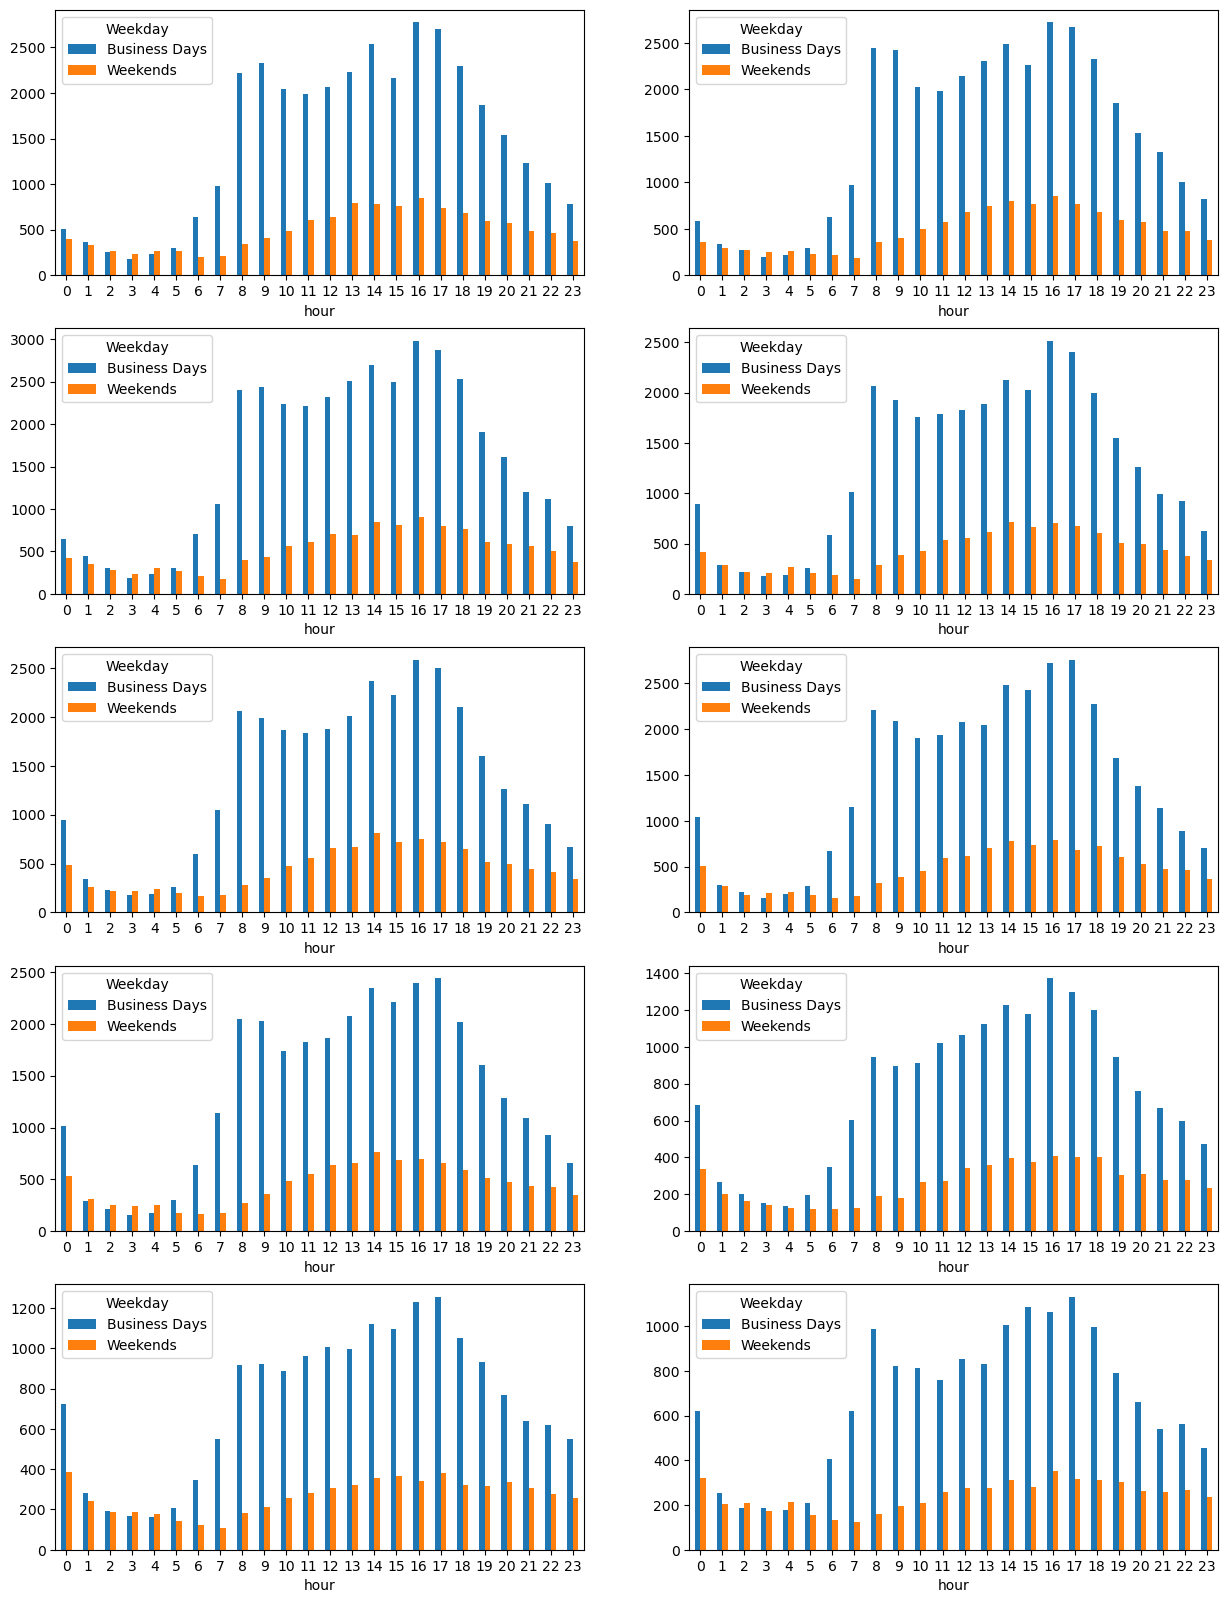

In [287]:
years = list(range(2013,2023))
fig, ax = plt.subplots(figsize=(15, 20))
for i, year in enumerate(years):
    plt.subplot(5, 2, i+1)  # set the subplot position
    grouped_count.loc[year].plot(kind='bar', ax=plt.gca(), rot=0)


In [137]:
# Create a DataFrame that contains the number of weekdays and weekends for each year
days_count = data_Brok.groupby(["Year", "Weekday"])["COLLISION_ID"].nunique().unstack()
days_count.columns = ["Business Days", "Weekends"]
normalized_collision = grouped_count / days_count

/tmp/ipykernel_965/3621294612.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)  # set the subplot position


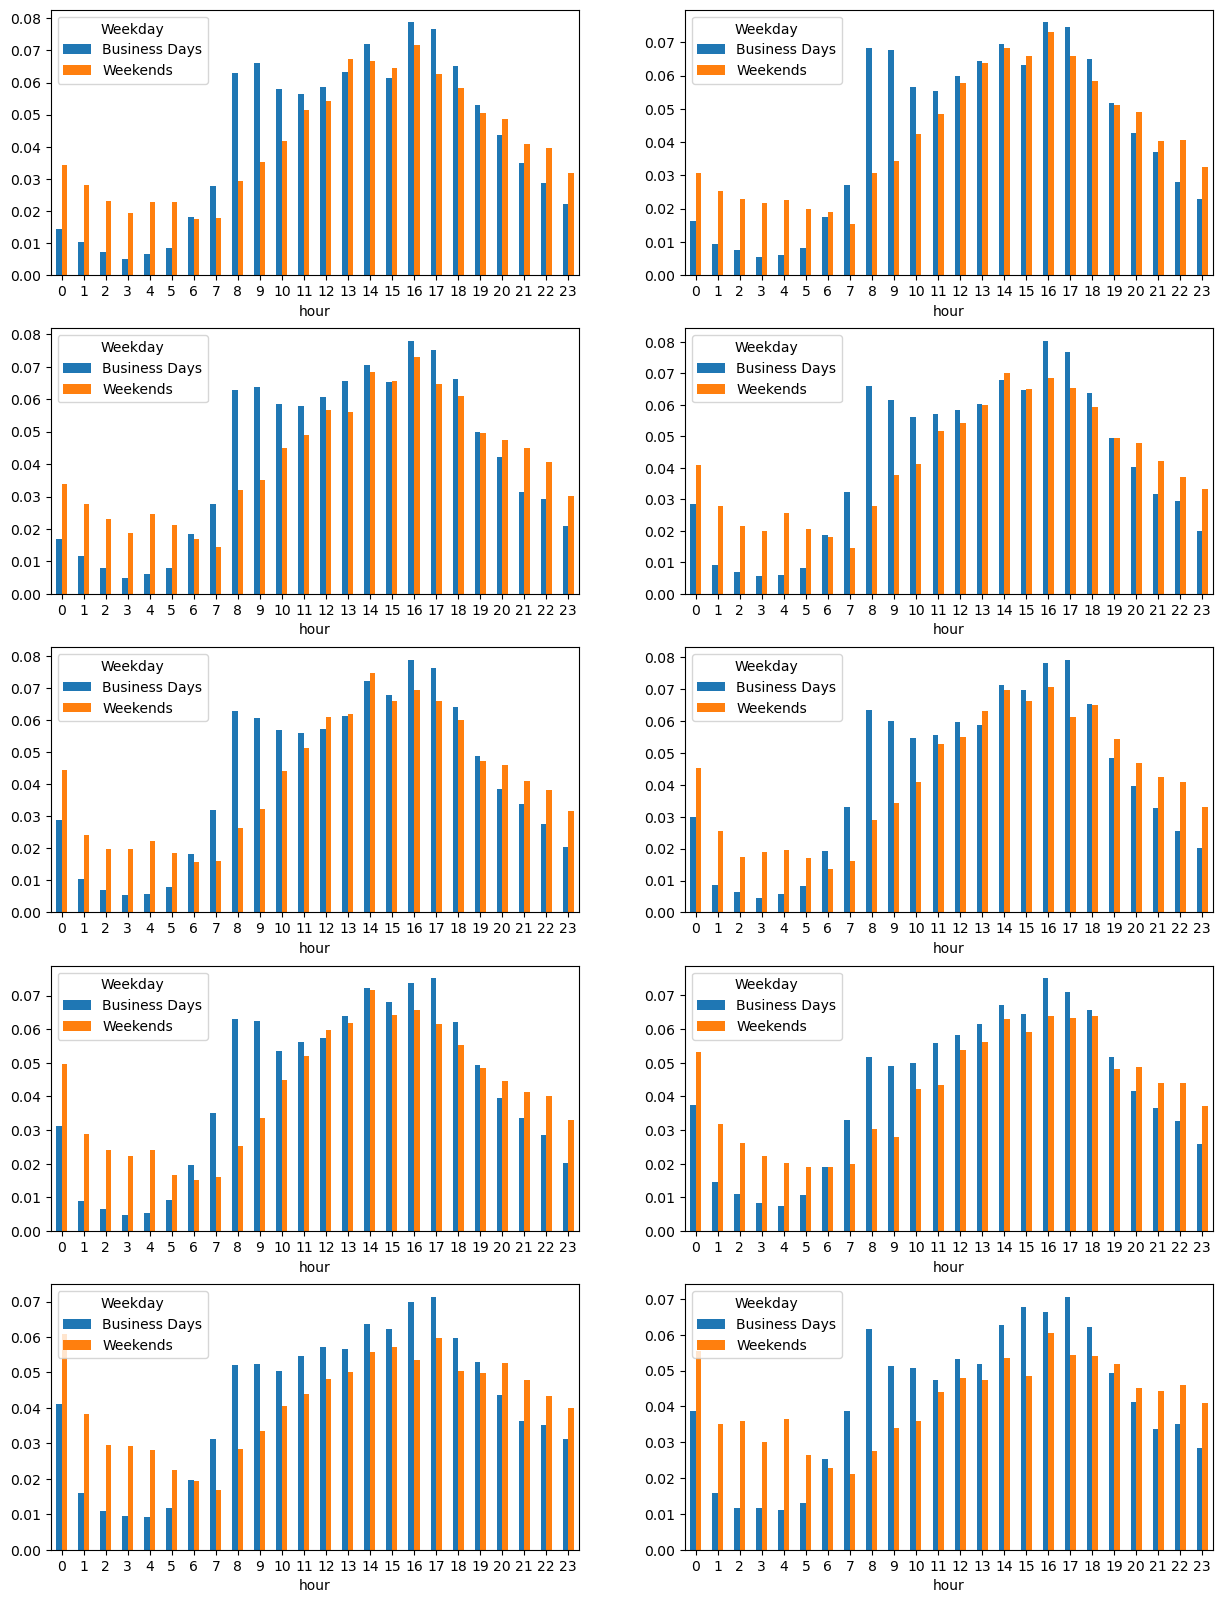

In [138]:
years = list(range(2013,2023))
fig, ax = plt.subplots(figsize=(15, 20))
for i, year in enumerate(years):
    plt.subplot(5, 2, i+1)  # set the subplot position
    normalized_collision.loc[year].plot(kind='bar', ax=plt.gca(), rot=0)

In [271]:
data_Brok = data
data_Brok['Date_Time'] = pd.to_datetime(data_Brok['Date_Time'])
data_Brok["Weekday"] = data_Brok.Date_Time.dt.dayofweek < 5
data_Brok["hour"] = data_Brok.Date_Time.dt.hour
data_Brok['Weekday'] = data_Brok['Weekday'].replace({True: 'Business Days', False: 'Weekends'})
data_bor = data_Brok.groupby(["Year", "BOROUGH", "hour", "Weekday"]).count()["COLLISION_ID"].unstack()
data_bor

/tmp/ipykernel_965/606926400.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/606926400.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/606926400.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/606926

Weekday                  Business Days  Weekends
Year BOROUGH       hour                         
2013 BRONX         0               236       186
                   1               167       142
                   2               112       122
                   3                81       112
                   4                98       131
...                                ...       ...
2022 STATEN ISLAND 19               75        36
                   20               66        30
                   21               71        26
                   22               65        21
                   23               49        28

[1200 rows x 2 columns]

In [308]:
days_count = data_Brok.groupby(["Year", "Weekday"])["COLLISION_ID"].nunique().unstack()
days_count.columns = ["Business Days", "Weekends"]
data_bor_norm = data_bor / days_count
data_bor_norm.loc[2013, "BRONX"]

Weekday,Business Days,Weekends
hour,,
0,0.006698,0.015841
1,0.004740,0.012093
2,0.003179,0.010390
3,0.002299,0.009538
4,0.002781,0.011157
5,0.003037,0.009709
6,0.007323,0.008431
7,0.014049,0.006387
8,0.033662,0.013711


In [316]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hours = list(range(0, 24))
years = list(range(2013, 2023))
boroughs = list(data.BOROUGH.unique())
colors = {'Business Days':'steelblue',
          'Weekends Days':'firebrick'}


fig = make_subplots(rows=5, cols=2, shared_yaxes=True, shared_xaxes=True, subplot_titles=years)

for i, year in enumerate(years):
    for j, bor in enumerate(boroughs):
        # Set the column index
        column_idx  = 1 if i%2==0 else 2
        row_idx = i//2+1
        fig.add_trace(go.Bar(x=hours, y=data_bor_norm.loc[year, bor]["Business Days"], marker_color=colors["Business Days"], visible=(j==0), name='Business Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
        fig.add_trace(go.Bar(x=hours, y=data_bor_norm.loc[year, bor]["Weekends"], marker_color=colors["Weekends Days"], visible=(j==0), name='Weekends Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
    

fig.update_layout(width=1200, height=1600,coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label=borough, method="update", args=[{"visible": [((j==i*2) or (j==i*2+1)) for j in range(len(boroughs)*2)]}, {"title": "Normalized Collision Count by Hour for " + borough}])
                    for i, borough in enumerate(boroughs)
                ]),
                x=0.05, y=1.1, xanchor="left", yanchor="top"
            )
        ],
        title_text="Normalized Collision Count by Hour for " + boroughs[0],
        title_x=0.5
    )
fig.update_xaxes(title_text="Hour of day", tickmode="array", tickvals=list(range(24)), ticktext=[f"{h:02d}:00" for h in range(24)])


fig.show()
fig.write_html("../assets/images/analysis/hor_by_borough.html")

In [317]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hours = list(range(0, 23))
years = list(range(2013, 2023))
boroughs = list(data.BOROUGH.unique())
colors = {'Business Days':'steelblue',
          'Weekends Days':'firebrick'}


fig = make_subplots(rows=5, cols=2, shared_yaxes=True, subplot_titles=years)

for i, year in enumerate(years):
    for j, bor in enumerate(boroughs):
        # Set the column index
        column_idx  = 1 if i%2==0 else 2
        row_idx = i//2+1
        fig.add_trace(go.Bar(x=hours, y=data_bor.loc[year, bor]["Business Days"], marker_color=colors["Business Days"], visible=(j==0), name='Business Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
        fig.add_trace(go.Bar(x=hours, y=data_bor.loc[year, bor]["Weekends"], marker_color=colors["Weekends Days"], visible=(j==0), name='Weekends Days' if i==0 else '', showlegend=True if i==0 else False), row=row_idx, col=column_idx)
    

fig.update_layout(width=1000, height=1200,coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label=borough, method="update", args=[{"visible": [((j==i*2) or (j==i*2+1)) for j in range(len(boroughs)*2)]}])
                    for i, borough in enumerate(boroughs)
                ]),
                x=0.05, y=1.1, xanchor="left", yanchor="top"
            )
        ],
        title_text="Collision Count by Hour for Brooklyn",
        title_x=0.5
    )
fig.show()



In [444]:
data_Brok = data
data_Brok['Date_Time'] = pd.to_datetime(data_Brok['Date_Time'])
data_Brok["Weekday"] = data_Brok.Date_Time.dt.dayofweek < 5
data_Brok["hour"] = data_Brok.Date_Time.dt.hour
data_Brok['Weekday'] = data_Brok['Weekday'].replace({True: 'Business Days', False: 'Weekends'})
data_Brok["Month"] = data_Brok["Date_Time"].dt.month
data_Brok["Day"] = data_Brok["Date_Time"].dt.day

/tmp/ipykernel_965/1634189352.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/1634189352.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/1634189352.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_965/163

In [447]:
df_brook_filter = data_Brok.loc[data_Brok.BOROUGH == "BROOKLYN"].loc[data_Brok.Year==2014]
df_brook_fil_group = df_brook_filter.groupby(["Month", "Day"]).count()["COLLISION_ID"]
df_brook_fil_group

Month  Day
1      1       92
       2      153
       3       92
       4      103
       5       73
             ... 
12     27     104
       28      82
       29     100
       30     122
       31     114
Name: COLLISION_ID, Length: 365, dtype: int64

In [456]:
df_brook = pd.read_csv("Brooklyn 2014-01-01 to 2015-12-31.csv")
df_brook['datetime'] = pd.to_datetime(df_brook['datetime'])
df_brook["Year"] = df_brook["datetime"].dt.year
df_brook["Month"] = df_brook["datetime"].dt.month
df_brook["Day"] = df_brook["datetime"].dt.day

In [472]:
df_brook_fore = df_brook[['Year', "Month", "Day", 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', "snow", "visibility"]]
df_brook_fore = df_brook_fore.loc[df_brook_fore.Year==2014].groupby(["Month", "Day"]).sum()
df_brook_fore["visibility"][1]

Day
1     16.0
2     12.2
3      9.3
4     16.0
5      7.5
6      9.8
7     16.0
8     16.0
9     16.0
10     8.0
11     7.2
12    16.0
13    15.7
14    13.3
15    10.2
16    14.3
17    16.0
18    12.8
19    16.0
20    16.0
21     6.8
22    15.1
23    16.0
24    16.0
25    13.1
26    15.6
27    16.0
28    16.0
29    13.4
30    16.0
31    16.0
Name: visibility, dtype: float64

In [477]:
list(range(1,len(df_brook_fil_group[1])+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [489]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

months = list(range(1,13))
colors = {'Collisions':'steelblue',
          'Visibility':'firebrick'}


fig = make_subplots(rows=6, cols=2, shared_yaxes=False, subplot_titles=months)

for i,mon in enumerate(months):
    column_idx  = 1 if i%2==0 else 2
    row_idx = i//2+1
    days = list(range(1,len(df_brook_fil_group[1])+1))
    fig.add_trace(go.Bar(x=days, y=df_brook_fil_group[mon], marker_color=colors["Collisions"], 
                         name='Collisions' if i==0 else '', showlegend=True if i==0 else False), 
                         row=row_idx, col=column_idx)
    fig.add_trace(go.Scatter(x=days, y=df_brook_fore["visibility"][mon], 
                             marker_color=colors["Visibility"], name='Visibility' if i==0 else '', 
                             showlegend=True if i==0 else False), row=row_idx, col=column_idx)
    
fig.update_layout(width=1000, height=1200,coloraxis=dict(colorscale='Bluered_r'), showlegend=True)

fig.show()


In [491]:
df_brook_fore.columns[1:]

Index(['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'snow',
       'visibility'],
      dtype='object')

In [504]:
fig = make_subplots(rows=6, cols=2, specs=[[{"secondary_y": True}, {"secondary_y": True}],
                                            [{"secondary_y": True}, {"secondary_y": True}],
                                             [{"secondary_y": True}, {"secondary_y": True}],
                                              [{"secondary_y": True}, {"secondary_y": True}],
                                               [{"secondary_y": True}, {"secondary_y": True}],
                                                [{"secondary_y": True}, {"secondary_y": True}],
                                            ])

condition = "snow"
colors = {"Collisions": "#FFA07A", condition: "#7EC0EE"}



for i, mon in enumerate(months):
    column_idx  = 1 if i%2==0 else 2
    row_idx = i//2+1

    days = list(range(1, len(df_brook_fil_group[1]) + 1))
    fig.add_trace(go.Bar(x=days, y=df_brook_fil_group[mon], marker_color=colors["Collisions"],
                         name='Collisions' if i == 0 else '', showlegend=True if i == 0 else False),
                         row=row_idx, col=column_idx)
    fig.add_trace(go.Scatter(x=days, y=df_brook_fore[condition][mon],
                             marker_color=colors[condition], name=condition if i == 0 else '',
                             showlegend=True if i == 0 else False), row=row_idx, col=column_idx, secondary_y=True)

    fig.update_yaxes(title_text="Collisions", row=row_idx, col=column_idx, secondary_y=False)
    fig.update_yaxes(title_text="Visibility", row=row_idx, col=column_idx, secondary_y=True)

fig.update_layout(width=1000, height=1200, coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

/tmp/ipykernel_965/3852340206.py:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



KeyError: 'temp'

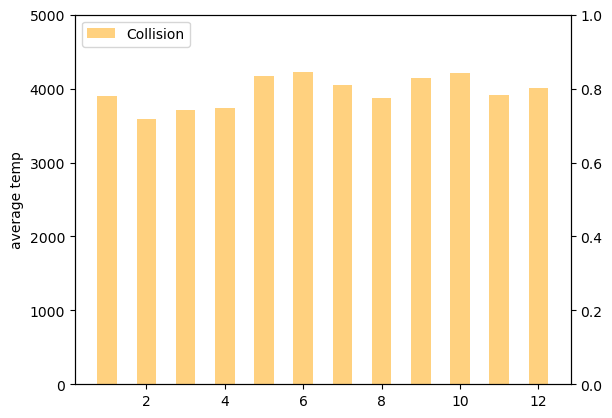

In [486]:
# plt.plot(months, df_brook_filter.groupby(["Year", "Month"]).mean()["temp"].unstack().loc[2014], "-b", label="average temp")
# plt.bar(months, month_df.loc[2014, "BROOKLYN"], width=0.5, alpha=0.5, color='orange', label="Collisions", )
# plt.legend(loc="upper left")
# plt.show()

# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.bar(months, month_df.loc[2014, "BROOKLYN"], width=0.5, alpha=0.5, color='orange') 
ax1.set_ylabel('average temp')
ax1.set_ylim(0, 5000)
ax1.legend(['Collision'], loc="upper left")
# set up the 2nd axis

ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.plot(months, df_brook_filter.groupby(["Year", "Month"]).mean()["temp"].unstack().loc[2014])
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average percipitation mm')
ax2.set_ylim(0, 25)
ax2.legend(['Average Temperature'], loc="upper right")
plt.show()